In [3]:
import json
import matplotlib.pyplot as plt
from pathlib import Path as P
import numpy as np
from collections import OrderedDict

In [6]:
# MNIST
root_1 = 'check_mnist_ori_new'
root_2 = 'check_mnist_dc_new'
root_3 = 'check_mnist_dcsa'
root_4 = 'check_mnist_dcun_1'
root_5 = 'check_mnist_sa_want'
data_root = 'logs.json'
d_path_1 = P(root_1) / data_root
d_path_2 = P(root_2) / data_root
d_path_3 = P(root_3) / data_root
d_path_4 = P(root_4) / data_root
d_path_5 = P(root_5) / data_root
d_path_1.is_file(), d_path_2.is_file(), d_path_3.is_file(), d_path_4.is_file(), d_path_5.is_file()

(True, True, True, True, True)

In [20]:
# CIFAR
# root_1 = 'check_cifar_dcun'
root_2 = 'check_cifar_dcun_1'
root_3 = 'check_cifar_dcsa_test'
root_4 = 'check_cifar_sa_want'
data_root = 'logs.json'

# d_path_1 = P(root_1) / data_root
d_path_2 = P(root_2) / data_root
d_path_3 = P(root_3) / data_root
d_path_4 = P(root_4) / data_root
d_path_1.is_file(), d_path_2.is_file(), d_path_3.is_file(), d_path_4.is_file()

(True, True, True, True)

In [21]:
def get_fid_list(data_path):
    with data_path.open('r') as f:
        stat_dict = json.load(f)
    epoch_list = sorted(list(int(x) for x in stat_dict.keys()))
    fid_list = list(float(stat_dict[str(x)]['fid_score']) for x in epoch_list)
    return fid_list

In [22]:
def get_metric(fid_list):
    return np.argmin(fid_list), np.min(fid_list)

In [23]:
get_metric(get_fid_list(d_path_1)), get_metric(get_fid_list(d_path_2)), get_metric(get_fid_list(d_path_3)), get_metric(get_fid_list(d_path_4)), get_metric(get_fid_list(d_path_5))

((31, 109.8), (27, 22.45), (62, 33.07), (51, 35.42), (10, 10.21))

In [338]:
checkpoint_root = 'check_cifar_sa_want'
checkpoint_path = P(checkpoint_root)
data_root = 'logs.json'
data_path = checkpoint_path / data_root
data_path.is_file()

True

In [339]:
with data_path.open('r') as f:
    stat_dict = json.load(f)
len(stat_dict)

22

In [340]:
stat_dict['5']

{'disc_loss': '0.3426', 'fid_score': '105.7', 'gen_loss': '2.439'}

In [341]:
epoch_list = sorted(list(int(x) for x in stat_dict.keys()))
disc_list = list(float(stat_dict[str(x)]['disc_loss']) for x in epoch_list)
gen_list = list(float(stat_dict[str(x)]['gen_loss']) for x in epoch_list)
fid_list = list(float(stat_dict[str(x)]['fid_score']) for x in epoch_list)
len(disc_list), len(gen_list), len(fid_list)

(22, 22, 22)

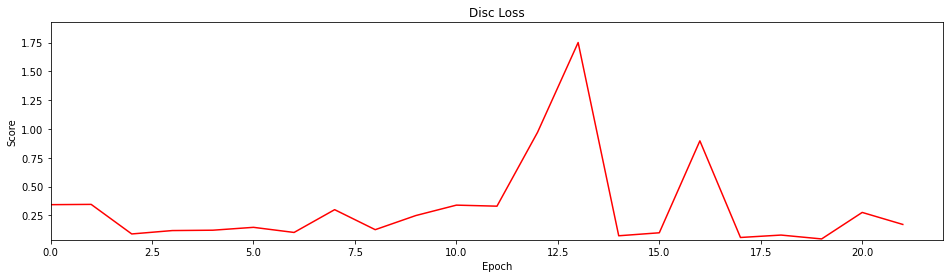

In [342]:
fig = plt.figure(figsize=(16, 4))

plt.title('Disc Loss')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.xlim(0, len(disc_list))
plt.ylim(min(disc_list)/1.2, max(disc_list)*1.1)
plt.plot(np.arange(len(disc_list)), disc_list, 'r')

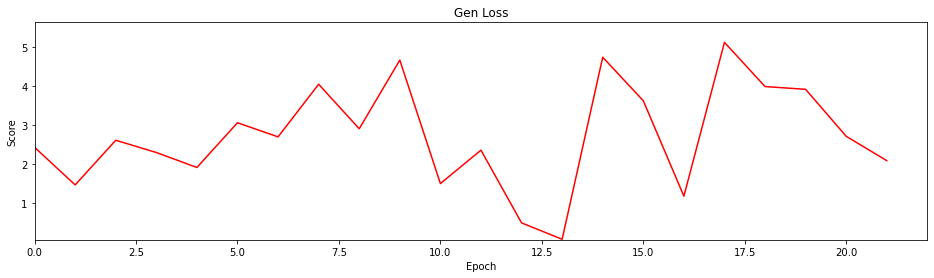

In [343]:
fig = plt.figure(figsize=(16, 4))

plt.title('Gen Loss')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.xlim(0, len(gen_list))
plt.ylim(min(gen_list)/1.2, max(gen_list)*1.1)
plt.plot(np.arange(len(gen_list)), gen_list, 'r')

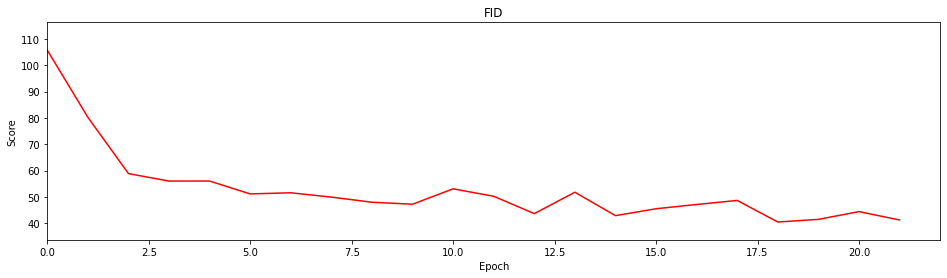

In [344]:
fig = plt.figure(figsize=(16, 4))

plt.title('FID')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.xlim(0, len(fid_list))
plt.ylim(min(fid_list)/1.2, max(fid_list)*1.1)
plt.plot(np.arange(len(fid_list)), fid_list, 'r')

In [345]:
np.argmin(fid_list), np.min(fid_list)

(18, 40.5)

In [274]:
fid_list[100]  # dc

26.92

In [23]:
fid_list[100]  # dcwl

121.8

In [24]:
fid_list[100]  # dcsn

121.8

In [ ]:
import torch